In [79]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import seaborn as sns
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#Data Cleanup

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [80]:
#Only get data analyst jobs in the US 
df_DA_US = df[(df['job_title_short']=='Data Analyst') & (df['job_country']== 'United States')].copy()

#Drop NaN values from the 'salary_year_avg' column for accurate visulization
df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])



In [81]:
df_DA_US = df_DA_US.explode('job_skills')

df_DA_US_group = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count','median'])
df_DA_US_top_pay = df_DA_US_group.sort_values(by='median', ascending=False).head(10)
df_DA_US_top_skills = df_DA_US_group.sort_values(by='count',ascending=False).head(10).sort_values(by='median', ascending=False).head(10)



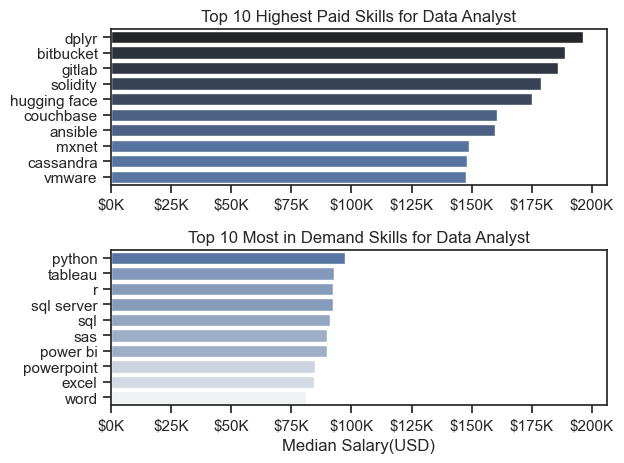

In [82]:
fig, ax = plt.subplots(2, 1)

sns.set_theme(style="ticks")

#df_DA_US_top_pay[::-1].plot(kind='barh',y='median', ax=ax[0], legend=False)

sns.barplot(data=df_DA_US_top_pay, x='median', y=df_DA_US_top_pay.index,ax=ax[0],hue='median',palette='dark:b_r')
ax[0].legend().remove()

ax[0].set_title('Top 10 Highest Paid Skills for Data Analyst')
ax[0].set_ylabel('')
ax[0].set_xlabel('') 
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))




sns.barplot(data=df_DA_US_top_skills, x='median', y=df_DA_US_top_skills.index,ax=ax[1], hue='median',palette='light:b')
ax[1].legend().remove()

#df_DA_US_top_skills[::-1].plot(kind='barh', y='median', ax=ax[1],legend=False)
ax[1].set_title('Top 10 Most in Demand Skills for Data Analyst')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary(USD)')
ax[1].set_xlim(ax[0].get_xlim())
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

fig.tight_layout()


Text(0, 0.5, 'Number of Jobs')

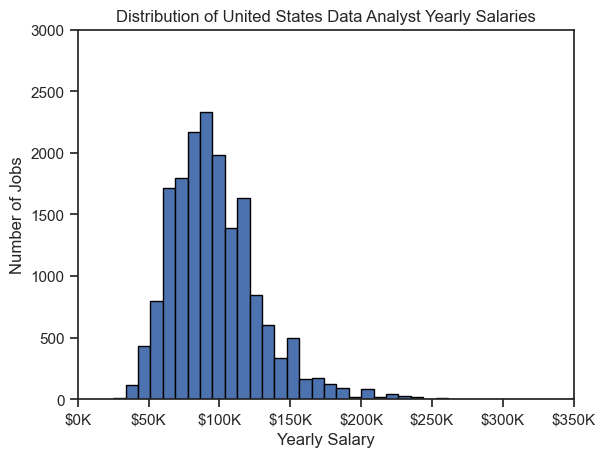

In [83]:
df_DA_US['salary_year_avg'].plot(kind='hist',bins=40, edgecolor='black')
plt.xlim(0, 350000)
plt.ylim(0, 3000)

ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _:f'${int(x/1000)}K'))

plt.title('Distribution of United States Data Analyst Yearly Salaries')
plt.xlabel('Yearly Salary')
plt.ylabel('Number of Jobs')

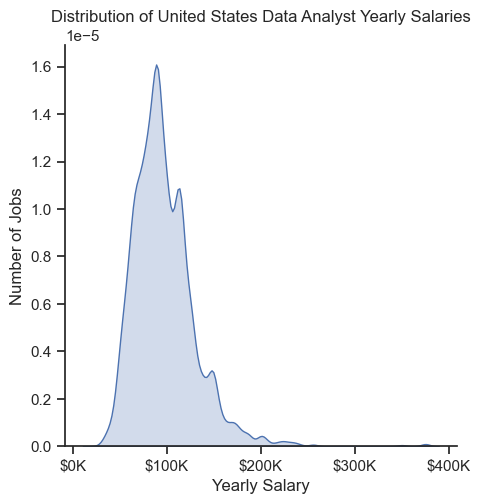

In [84]:
sns.set_theme(style="ticks")
sns.displot(df_DA_US['salary_year_avg'], kind='kde',fill=True)
plt.title('Distribution of United States Data Analyst Yearly Salaries')
plt.xlabel('Yearly Salary')
plt.ylabel('Number of Jobs')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _:f'${int(x/1000)}K'))
plt.show()

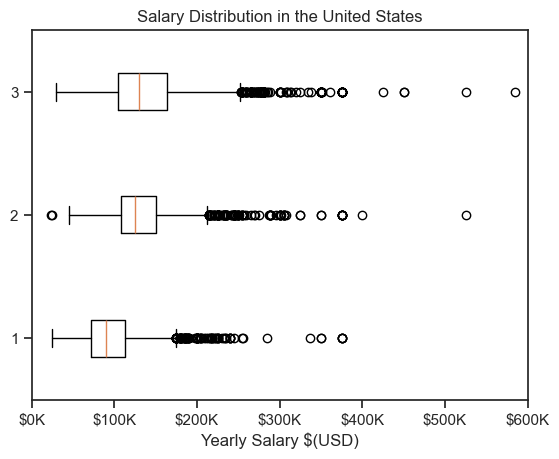

In [85]:
job_titles = ['Data Analyst','Data Engineer', 'Data Scientist']

# filter for the job titles and country
df_US = df[df['job_title_short'].isin(job_titles) & (df['job_country'] == "United States")].dropna(subset='salary_year_avg')

# List of salary for each job title
job_list = [df_US[df_US['job_title_short'] == job_title]['salary_year_avg'] for job_title in job_titles]

plt.boxplot(job_list,label=job_titles,vert=False)
plt.title('Salary Distribution in the United States')
plt.xlabel('Yearly Salary $(USD)')
plt.xlim(0,600000)
ticks_x = plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show()



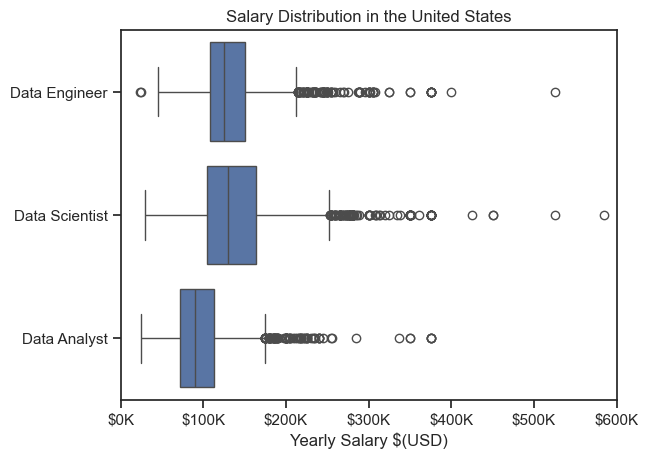

In [92]:
sns.boxplot(data=df_US, x = 'salary_year_avg', y='job_title_short')


plt.title('Salary Distribution in the United States')
plt.xlabel('Yearly Salary $(USD)')
plt.xlim(0,600000)
plt.ylabel('')
ticks_x = plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show()